# EDA Hackathon

**Dataset**: PUBG Dataset  
**Dataset description**: In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.
You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 players per group.  

**Task** - Perform Exploratory Data Analysis.  
- Detailed univariate and bivariate analysis with proper observations.
- Identify some research questions and perform hypothesis testing to test your hypothesis.
- A proper conclusion containing best observations.
- Your Jupyter Notebook should look like a storytelling book.



**Data Fields**:    
1. **DBNOs** - Number of enemy players knocked.  
2. **assists** - Number of enemy players this player damaged that were killed by teammates.  
3. **boosts** - Number of boost items used.  
4. **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.  
5. **headshotKills** - Number of enemy players killed with headshots.  
6. **heals** - Number of healing items used.  
7. **Id** - Player’s Id
8. **killPlace** - Ranking in match of number of enemy players killed.
9. **killPoints** - Kills-based external ranking of players. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
10. **killStreaks** - Max number of enemy players killed in a short amount of time.
11. **kills** - Number of enemy players killed.
12. **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
13. **matchDuration** - Duration of match in seconds.
14. **matchId** - ID to identify matches. There are no matches that are in both the training and testing set.
15. **matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
16. **rankPoints** - Elo-like ranking of players. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes the place of “None”.
17. **revives** - Number of times this player revived teammates.
18. **rideDistance** - Total distance traveled in vehicles measured in meters.
19. **roadKills** - Number of kills while in a vehicle.
20. **swimDistance** - Total distance traveled by swimming measured in meters.
21. **teamKills** - Number of times this player killed a teammate.
22. **vehicleDestroys** - Number of vehicles destroyed.
23. **walkDistance** - Total distance traveled on foot measured in meters.
24. **weaponsAcquired** - Number of weapons picked up.
25. **winPoints** - Win-based external ranking of players. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
26. **groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
27. **numGroups** - Number of groups we have data for in the match.
28. **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
29. **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.


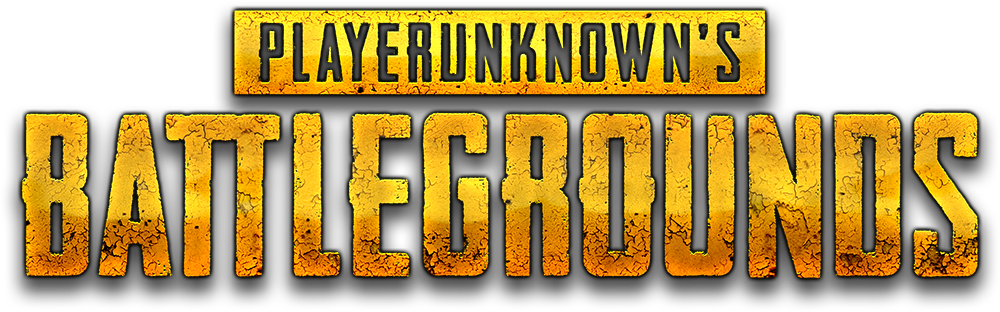

## Data cleaning and preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
%matplotlib inline

In [2]:
Data = pd.read_csv('PUBG.csv')
Data.head(10)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429
5,2862125,e705cb7a4446ea,9d7180a567d020,b146588581df18,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,446.00,3,0,0.4946
6,365937,e253262031e08f,e5df2dcdaf3f4b,c1385ae84655e6,0,0,0.00,0,0,0,...,0,0.0,0,0.0,0,0,45.86,1,0,0.1939
7,3651102,c264a5ce0d4ca1,0efbbf391d7f62,b280791eb7a3fd,0,8,170.20,0,0,1,...,0,0.0,0,221.0,0,0,3297.00,5,0,0.9688
8,2363197,342437cd2b5680,7acbacbed1b711,99cbf12f555f61,0,2,338.70,2,0,15,...,1,3349.0,0,0.0,0,0,1846.00,5,0,0.7174
9,271498,3cf3cc81325a37,537c4bd393dcff,38a8b94623d77d,2,1,230.80,2,0,1,...,0,0.0,0,0.0,0,0,3781.00,5,0,0.8387


In [3]:
Data.shape

(1111742, 30)

**ANALYSIS** :   
Number of Rows : 11,11,742    
Number of Columns : 30    

In [4]:
Data.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [6]:
Data.describe().reset_index().T

,0,1,2,3,4,5,6,7
index,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1111742.0,2224361.627798,1283878.63498,6.0,1112440.25,2223772.5,3337953.75,4446964.0
assists,1111742.0,0.233674,0.589403,0.0,0.0,0.0,0.0,17.0
boosts,1111742.0,1.106655,1.71605,0.0,0.0,0.0,2.0,24.0
damageDealt,1111742.0,130.736407,171.175538,0.0,0.0,84.11,185.9,5990.0
DBNOs,1111742.0,0.657361,1.146023,0.0,0.0,0.0,1.0,35.0
headshotKills,1111742.0,0.226649,0.603336,0.0,0.0,0.0,0.0,64.0
heals,1111742.0,1.370348,2.683819,0.0,0.0,0.0,2.0,73.0
killPlace,1111742.0,47.595622,27.470247,1.0,24.0,47.0,71.0,100.0
killPoints,1111742.0,504.430117,627.400616,0.0,0.0,0.0,1171.0,2170.0


## Exploratory Data Analysis

**KILL ANALYSIS**

<AxesSubplot:xlabel='kills'>

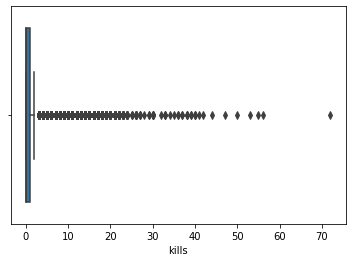

In [12]:
sns.boxplot(Data['kills'])

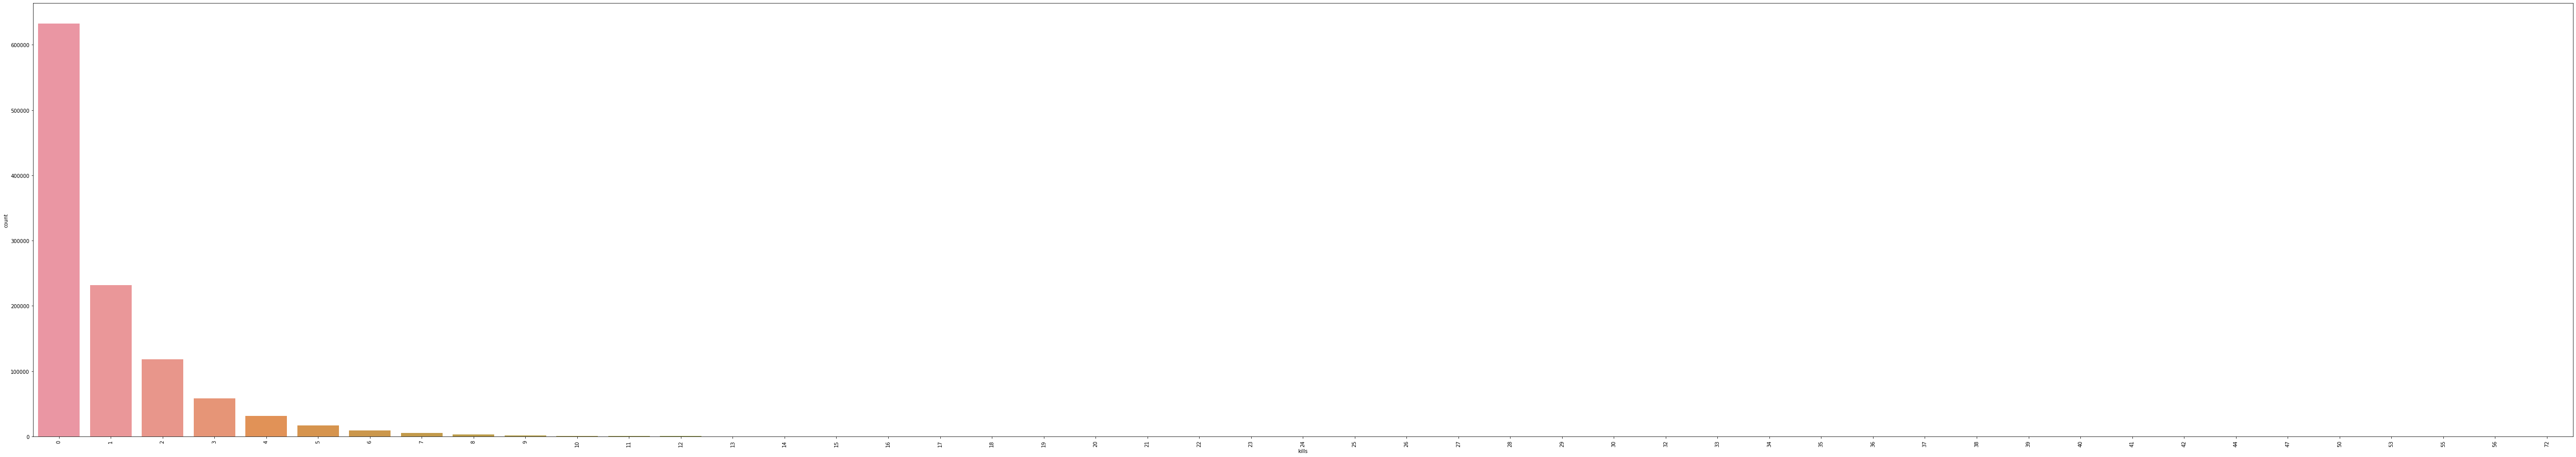

In [13]:
Fig = plt.figure(figsize = (200, 35))
A1 = Fig.add_subplot(222)
A = sns.countplot(Data['kills'] , ax = A1)
for item in A.get_xticklabels():
    item.set_rotation(90)    
plt.show()

**OUTCOME** :   
Number of Kills : Count   
0 : 6,00,000+   
1 : 2,30,000+   
2 : 1,20,000+   
The more the kills are, the less count/frequency of doing that will be there.

**KILL Streaks**

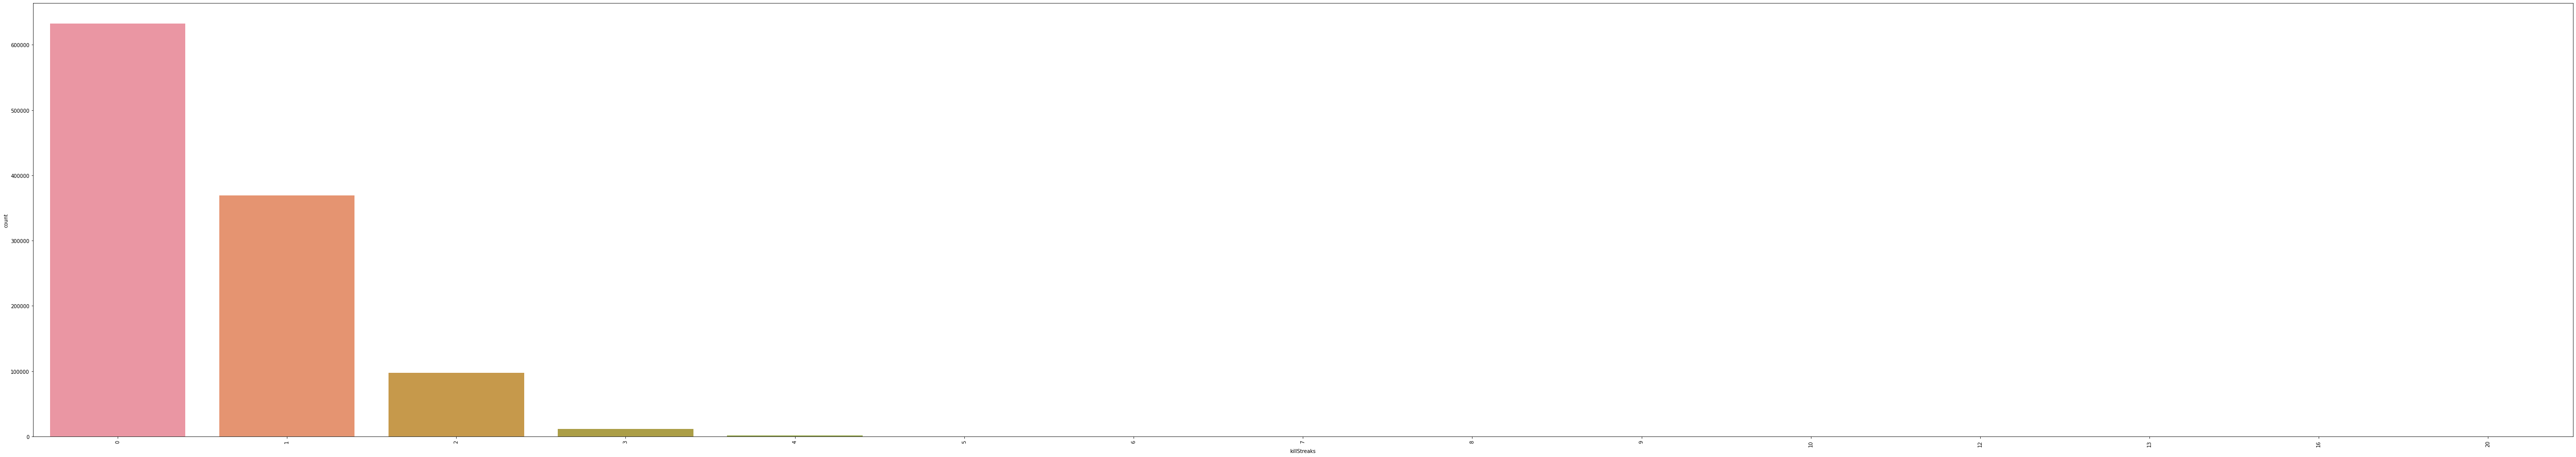

In [14]:
Fig = plt.figure(figsize = (200, 35))
A2 = Fig.add_subplot(222)
B = sns.countplot(Data['killStreaks'] , ax = A2)
for item in B.get_xticklabels():
    item.set_rotation(90)    
plt.show()

**OUTCOME** :   
Number of Kill Streaks : Count   
0 : 6,00,000+   
1 : 3,50,000+   
2 : 1,00,000+   
The more the kills are, the less count/frequency of doing that will be there.